# Assignment 1
___


**Submitted by:**
* Gaganpreet Singh (B00819217)
* Shruthi Kalasapura Ramesh (B00822766)





# 1.   Introduction

The provided dataset gives an overview of restaurants located at different places in Bangalore. 
The crux of analysing this dataset is to understand the trends in restaurants based on the multiple attributes such as location, cuisine, restaurant type, cost, rating etc. and how these attributes impact the business of these establishments. 

The dataset helps in identiifying various trends like what type of food is popular in a particular area, what factors affect the rating of a restaurant, what cuisines are popular among people in a given region etc. Moreover, this data can help new restaurant owners identify their competition, and thus select their restaurant's concept, cuisine and cost for a given location. 



In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.   Data pre-processing and understanding


## **a) Loading Data**
 
 The provided dataset is loaded in Jupyter notebook using ''`read_csv`'' function of pandas library.












In [2]:
#reading csv file and loading it into pandas dataset
dataset = read_csv('/Users/gaganpree99/Desktop/zomato.csv')

## b)  Explore the data. Plot the distribution of the attributes (frequency). What trends can you find in your data?

The provided dataset has the following attributes:

In [3]:
# Check Dataset 
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

Here we can see that there are quite a lot of attributes that have NULL attributes. There are certain entries with `rate` values as 'NEW' or '-'. 
 We decided not to drop these tuples as they might contain some useful information regarding restaurants and have replaced these values with a value of 2.5. The value of 2.5 was taken because it indicates the restaurant is neither bad not good.

Also, there were approximately 7700 tuples with NULL value in rate. We have filled them with these entries with mean value of the datset.

In [4]:
# Cleaning the 'rate' attribute.
# New entries are being replaced with a value of 0
dataset["rate"]= dataset["rate"].str.replace('NEW', '2.5')
dataset["rate"]= dataset["rate"].str.replace('-', '2.5')

# Removing '/5' from rate attribute
# Rate values are read as objects and 
# must be converted back to Numeric Type
dataset["rate"]= dataset["rate"].str.replace(r'\/5$', '').astype("float")

# Replace the Null 'Rate' entries with mean values of rating
dataset=dataset.fillna({'rate':dataset["rate"].mean()})
dataset["rate"] = dataset["rate"].round(1)

# Convert all values to lower case
dataset["name"]= dataset["name"].str.lower()
dataset["rest_type"]= dataset["rest_type"].str.lower()
dataset["cuisines"]= dataset["cuisines"].str.lower()

# Changing Cost to numeric and filling empty rows with mean value
dataset['approx_cost(for two people)'] = dataset['approx_cost(for two people)'].str.replace(',', '')
dataset['approx_cost(for two people)'] = pd.to_numeric(dataset['approx_cost(for two people)'])
dataset=dataset.fillna({'approx_cost(for two people)':dataset["approx_cost(for two people)"].mean()})
dataset['approx_cost(for two people)'] = dataset['approx_cost(for two people)'].round(1)
dataset = dataset.sort_values(['name', 'location', 'rate']).drop_duplicates(['name', 'location'], keep='first')



---

The following graph shows the count of restaurants in different locations (top 20) in Bangalore

Text(0, 0.5, 'Locations')

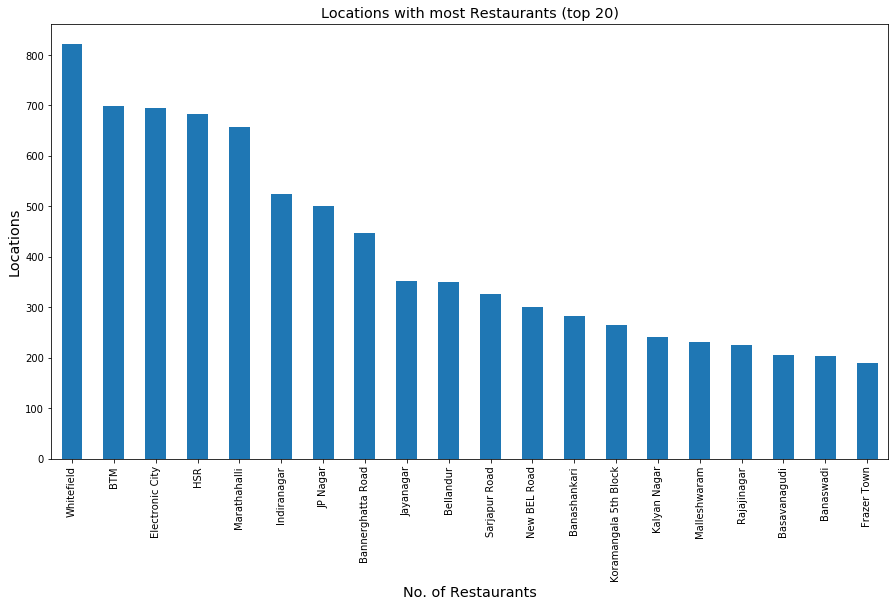

In [5]:
import matplotlib.pylab as pylab
# Setting properties for plots
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
pylab.rcParams.update(params)

#Plotting distribution of the attributes
plotData=dataset.copy()
plotData['location'].value_counts()[:20].plot(kind="bar",title="Locations with most Restaurants (top 20)")
plt.xlabel("No. of Restaurants")
plt.ylabel("Locations")

- - - 

The following plot shows the restaurants that have the maximum outlets in Banglore City (Top 20)

Text(0, 0.5, 'Restaurant Name')

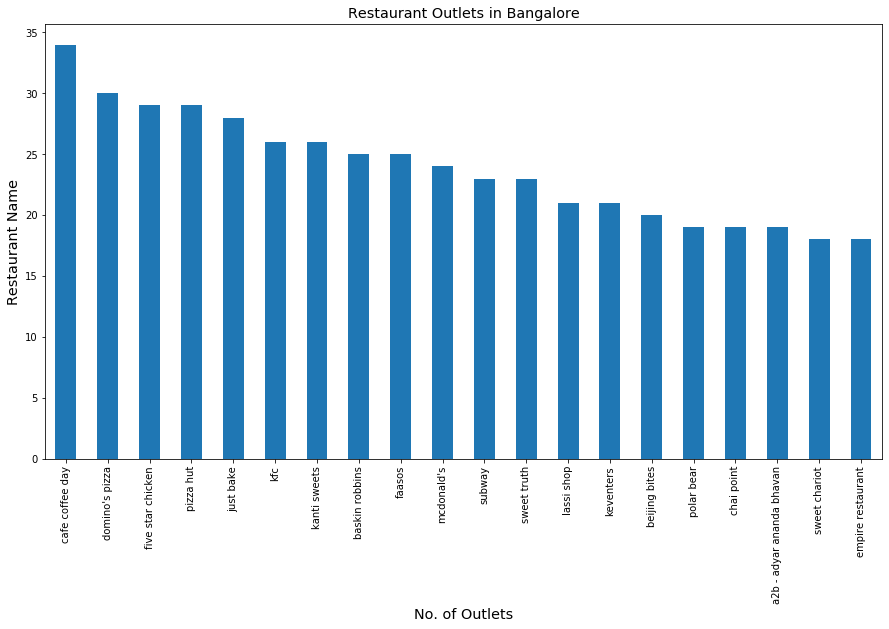

In [6]:
plotData['name'].value_counts()[:20].plot(kind='bar', title="Restaurant Outlets in Bangalore")
plt.xlabel("No. of Outlets")
plt.ylabel("Restaurant Name")

- - - 

The following pie chart depicts the percentage of Restaurants that accept online orders.

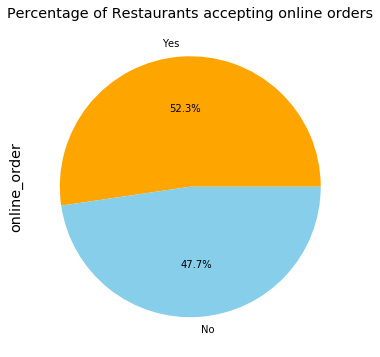

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
plotData["online_order"].value_counts().plot.pie( autopct = "%.1f%%", colors = ['orange', 'skyblue'],title="Percentage of Restaurants accepting online orders", )

- - - 
The following pie chart depicts the percentage of Restaurants that allow table booking.

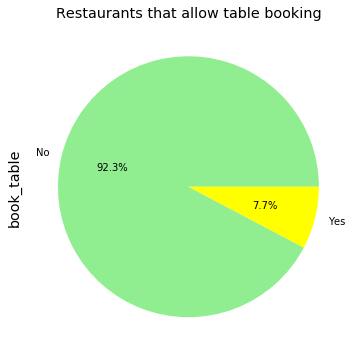

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
plotData['book_table'].value_counts().plot(kind='pie',autopct = "%.1f%%",colors = ['lightgreen', 'yellow'], title="Restaurants that allow table booking")

- - -

The following chart shows the distribution of cost over the provided data.

Text(0, 0.5, 'Distribution')

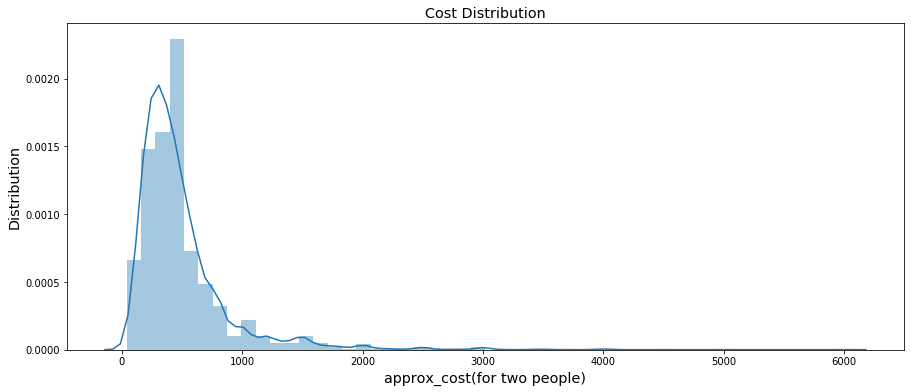

In [9]:
# Reference : https://seaborn.pydata.org/generated/seaborn.distplot.html
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(plotData["approx_cost(for two people)"],  norm_hist=True)
plt.title('Cost Distribution')
plt.ylabel("Distribution")

> From the cost distribution graph, we can infer that most of the restaurants tend to serve food for less than 1,000 Rupees.


---


The followinhg bar graph shows the distribution of types of rstaurants in Bangalore city.

Text(0, 0.5, 'Listed_in(type)')

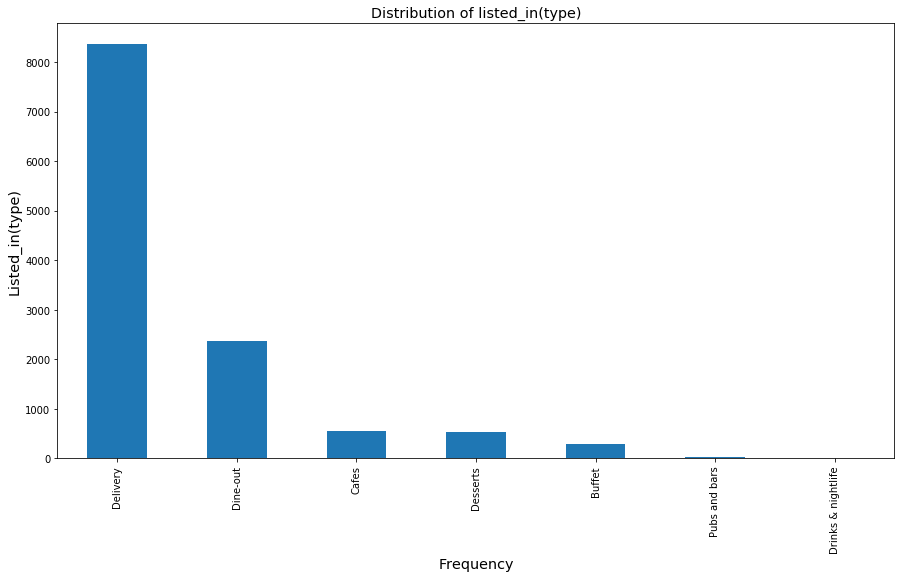

In [10]:
plotData['listed_in(type)'].value_counts()[:20].plot(kind="bar",title="Distribution of listed_in(type)")
plt.xlabel("Frequency")
plt.ylabel("Listed_in(type)")

---
The following bar graph shows how Booking and Average cost are related.

Text(0, 0.5, 'Propotion')

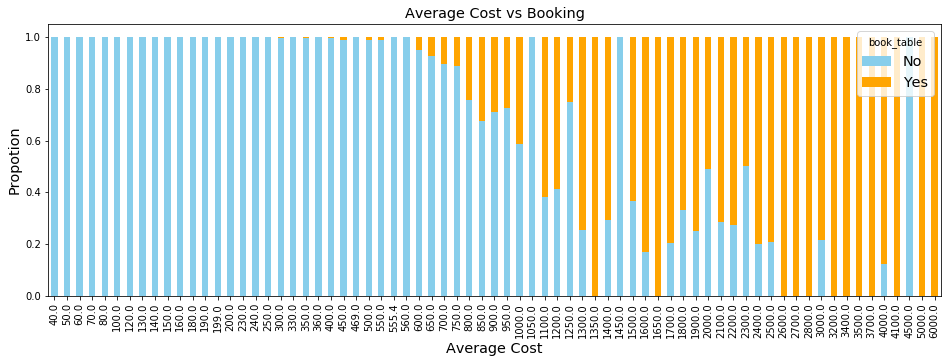

In [11]:
x = pd.crosstab(plotData['approx_cost(for two people)'], 
                plotData['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True,
                                             color=['skyblue','orange'],
                                             title="Average Cost vs Booking",
                                             figsize=(16,5))
plt.xlabel("Average Cost")
plt.ylabel("Propotion")



The above graph shows the trend of booking and average cost. We can infer that most restaurants that don't have table booking tend to have cost less than 1,000 Rupees.

---

##  Are there attributes that are useless at this point?
On initial analysis of the data, we observed that there are certain attributes in the dataset that might not be useful for any business problem. 
For example, we noticed that columns like `url` and `phone` are not of much use when we need to understand the reviews/ratings of these restaurents.
 
Also, we noticed that attributes `location` and  `listed_in(city)` are almost similar and one of these can be dropped.

---

## c)  Are there restaurant duplicates in the data? Detect and if there is, clean it.

There are entries in the dataset that have same values for `name` and `location` attribute.
 To remove these duplicate entries, we first sorted the unique combination of Name, Location and Rate and then dropped all duplicate rows.

Sorting on Rate ensures that if any duplicate entries have Rate as NaN, then those entries are dropped

In [12]:
## Removing Duplicate Entries of Restaurents
# Sort the unique combination of Name, Location and Rate. And then drop all duplicate values 
# Sorting on Rate ensures that if any duplicate entries have Rate as NaN, then those entries are dropped
dataset = dataset.sort_values(['name', 'location', 'rate']).drop_duplicates(['name', 'location'], keep='first')

---

## d)  What is the neighborhood with the highest average rating? What are the major characteristics of this neighborhood (e.g., type of restaurant, type of food they offer, etc).
 >
 > The following chart shows the neighbourhood with their average ratings

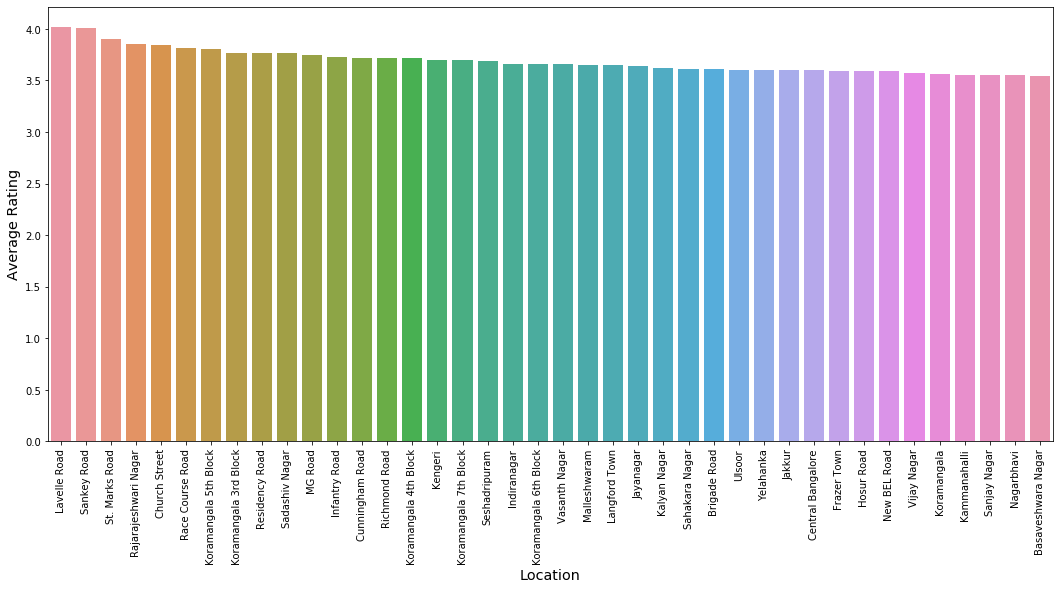

In [13]:
# Finding the neighbourhood with heighest average rating
# Reference : https://seaborn.pydata.org/generated/seaborn.barplot.html
fig, ax = plt.subplots(figsize=(18,8))
highest_rate = (plotData.groupby('location', as_index=False).agg({'rate':'mean'})).sort_values('rate',ascending=False)
df = pd.DataFrame(data = highest_rate, columns = highest_rate["rate"])
sns.barplot(y=highest_rate["rate"], x=highest_rate["location"][:40], data=pd.melt(df))
plt.xticks(rotation=90)
ax.set(xlabel='Location', ylabel='Average Rating')

plt.show()

> This plot shows that **Lavelle Road** has the highest rating of ~4.0
- - -
> The following bar graph shows the trends of cuisines in Lavelle Road.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

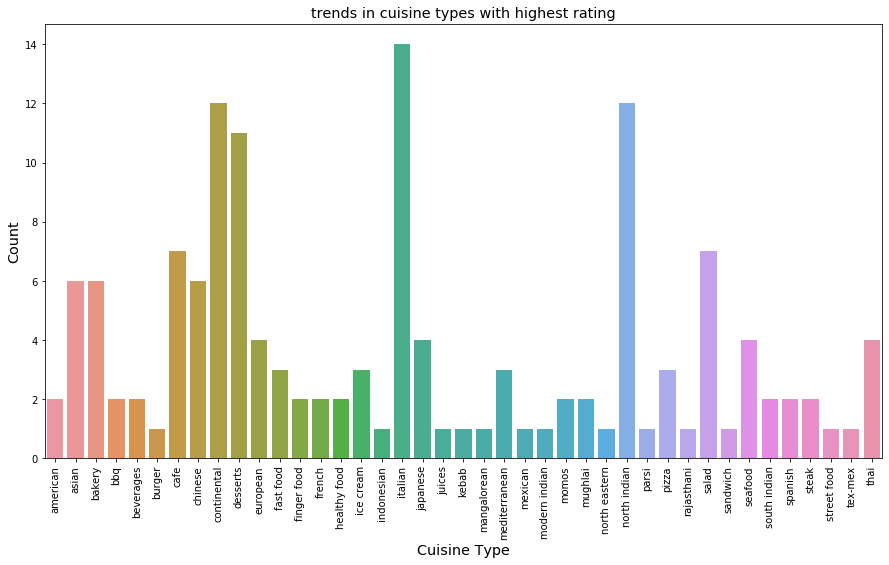

In [14]:
# Characteristics of neighbourhood with heighest average rating
mlb = MultiLabelBinarizer()
neighbourhood=highest_rate["location"][:1]

# Fetching records of neighbourhood with highest average rating
chars=plotData.loc[dataset['location'].isin(neighbourhood)]
chars=chars[['rest_type','cuisines','approx_cost(for two people)']]


cuisine_subset = pd.DataFrame(mlb.fit_transform(chars["cuisines"].astype(str).str.split(',\s*')),columns=mlb.classes_)
rest_type_subset = pd.DataFrame(mlb.fit_transform(chars["rest_type"].astype(str).str.split(',\s*')),columns=mlb.classes_)

charsCuisine = pd.concat([cuisine_subset], axis = 1)
charsRest = pd.concat([rest_type_subset], axis = 1)

# Plotting trends in cuisines in the neighbourhood
fig, ax = plt.subplots(figsize=(15,8))
cuisines =  pd.DataFrame({"name":charsCuisine.columns, "count":charsCuisine.sum(axis = 0, skipna = True)}) 
sns.barplot(y=cuisines["count"], x=cuisines["name"], data=cuisines).set_title("trends in cuisine types with highest rating")
ax.set(xlabel='Cuisine Type', ylabel='Count')

plt.xticks(rotation=90)

From the above graph we can see the trend in Cuisine types in Lavelle Road.
As we can see here, most common cuisine type is **Italian**.

The next most popular cuisines in this neighbourhood are Continental, North Indian & desserts.

---


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

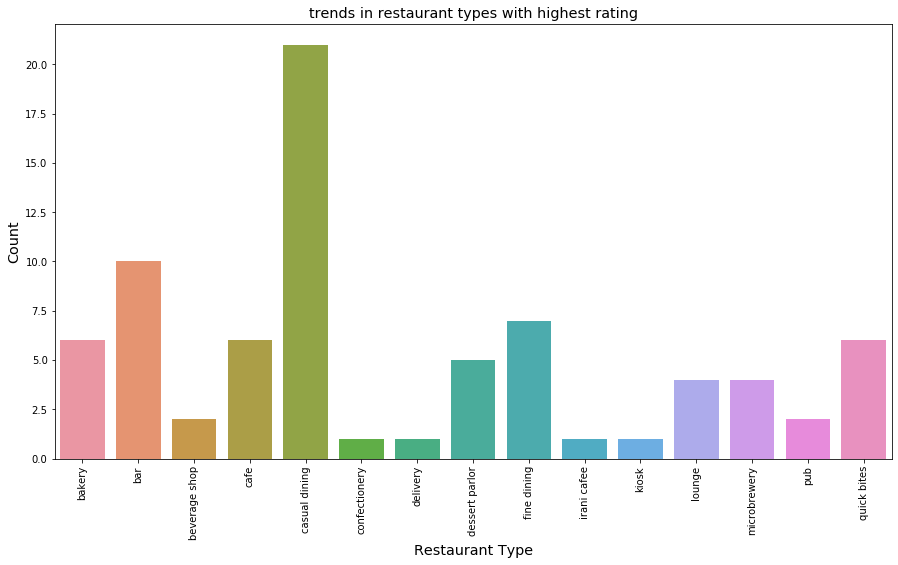

In [15]:
# Plotting trends in restaurant types in the neighbourhood
fig, ax = plt.subplots()
rest=pd.DataFrame({"name":charsRest.columns, "count":charsRest.sum(axis = 0, skipna = True)}) 
sns.barplot(y=rest["count"], x=rest["name"], data=rest).set_title("trends in restaurant types with highest rating")
ax.set(xlabel='Restaurant Type', ylabel='Count')

plt.xticks(rotation=90)

From the above graph we can see the trend in Restaurant types in Lavelle Road. As we can see here, most of the restaurants are **Casual Dining**. There are very few restaurants that offers delivery in this area. Therefore, this can be seen as an opportunity to increase  business by delivering food directly to the customer's location.

# 3.   Build the best model you can that forecasts the approximate cost of a meal for two people using the attributes location, rating, restaurant type, and cuisine.
 Following code creates a final dataset that contains all the required attributes.


In [16]:
# Take only desired attributes
FinalDataset = dataset[['location','cuisines','rate','rest_type','approx_cost(for two people)']]

#Drop all NaN values that are left in Dataset
FinalDataset.dropna(how='any',inplace=True)

# Reset Index and check
FinalDataset = FinalDataset.reset_index(drop=True)
FinalDataset.info()

# Write the Dataset to file for manual validation
FinalDataset.to_csv('test.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 5 columns):
location                       12064 non-null object
cuisines                       12064 non-null object
rate                           12064 non-null float64
rest_type                      12064 non-null object
approx_cost(for two people)    12064 non-null float64
dtypes: float64(2), object(3)
memory usage: 471.3+ KB


## a)  Explain what is the task you’re solving (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x etc)

In the provided data, we already have a labelled dataset. Labelled dataset is one which have both input and output parameters. Due to this we are considering this problem as a ***Supervised Learning*** Problem.

Since, the target target (i.e. cost for 2 people) can take continuous values the task at hand is ***Regression***. The goal here is to predict a value i.e. the cost, as much closer to actual target value as our model can and then evaluation is done by calculating error. The smaller the error the greater the accuracy of our regression model.


In [17]:
mlb = MultiLabelBinarizer()

# Transforming Rate attribute
rate_subset = pd.to_numeric(FinalDataset['rate']).round(1)

# Using MultiLabelBinarizer to perform One Hot Encoding
location_subset = pd.get_dummies(FinalDataset['location'],prefix='loc')
cuisine_subset = pd.DataFrame(mlb.fit_transform(FinalDataset["cuisines"].astype(str).str.split(',\s*')),columns='cus_'+mlb.classes_)
rest_type_subset = pd.DataFrame(mlb.fit_transform(FinalDataset["rest_type"].astype(str).str.split(',\s*')),columns='r_t_'+mlb.classes_)

# Concatenate all required attributes to form Feature Set
features = pd.concat([rate_subset, cuisine_subset, rest_type_subset, location_subset], axis = 1)

# Transforming Target Attribute
target = FinalDataset['approx_cost(for two people)']

 ## b)  What models will you choose? Why?

 We need to find a model with that has minimum bias and the most precise estimates. The model used for this Regression problem is **XGBoost** (stands for eXtreme Gradient Boosting).

 The reason for using XGBoost are:
 
*   ***Execution Speed:*** XGBoost is quite fast in comparison to other gradient boosting models.
*   ***Model Performance:*** XGBoost exceeds several other well-known gradient tree boosting implementations.
*   ***Memory Optimization:*** XGBoost makes efficient use of memory resources to increase the performance and speed of processing.
*   ***Robust Models:*** XGBoost uses regularized model formalization technique to ensure that the model does not overfit.


----


 ## c)  Which metrics will you use to evaluate your model?
 There are various metrics that can be used evaluate a model like Mean Absolute Error(MAE), Root Mean Squared Error (RMSE), R² etc.
In practical scenario, it is quite hard to predict the performance of a model based on MAE or RMSE as they do not give much information on how the model performs in comparison to constant baseline. 


 We are using the coefficient of determination, or commonly known as R² to evaluate our model. 
R² is the ratio of the dependent variables that can be predicted by the independant variables. R² is closely related to RMSE, but is scale-free which ensures that the R² is always between -∞ and 1.

Higher the value of the R², the better the model performs. 
 
----

 
 ## d)  How do you make sure not to overfit?

 In order to ensure that the model does not overfit, we are using cross validation technique.

 The purpose of cross-validation is to describe a dataset to test the model in the training phase (i.e. validation data set) to limit issues such as overfitting, underfitting, and to gain insights into how the model will generalize to an independent dataset.

The following flowchart illustrates the cross validation workflow in model training:



<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" alt="drawing" width="500"/>

sourec: https://scikit-learn.org/stable/modules/cross_validation.html



In [18]:
# Function to print Accuracy based on Scores value of a model
def print_accuracy_report(scores):
    print ("Accuracy: " + str(round(100*scores.mean(), 2)) + "%")
    print("Standard Deviation: ±%0.2f" % (scores.std() * 2))


 ---
 
## e)  Build your model and verify how it performs (using the metrics you have chosen in Section 3(c)) in your training data. Justify which evaluation approach you are using?(Out of sample validation or Cross-validation). Use a plot to justify your findings. How good is your model?

Following is the implementation of the xgBoostRegressor using cross validation.

.


In [19]:
# Implementing XgBoost with Cross Validation Technique
# to verify the scores and check Standard Deviation
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgbModel = xgb.XGBRegressor()

# To implement cross validation, the cross_val_score method is used. 
# The cross_val_score returns the accuracy for all the folds
scoreXG = cross_val_score(xgbModel, features, target, cv=6, scoring='r2')

# Find average of all the accuracies by using the mean() function
# Also find Standard 
print_accuracy_report(scoreXG)

[17:40:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 74.7%
Standard Deviation: ±0.02


 The model has an accuracy of 74.7%.

> The Standard deviation is: 0.02. This is quite low, which means that our model has a very low variance, which is actually  good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

In [20]:
# Checking model performance on training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=0)

xgbModel.fit(X_train,y_train)

y_pred_train = xgbModel.predict(X_train)
y_pred_test = xgbModel.predict(X_test)


[17:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**The following plot shows how the model performs on the training set:**

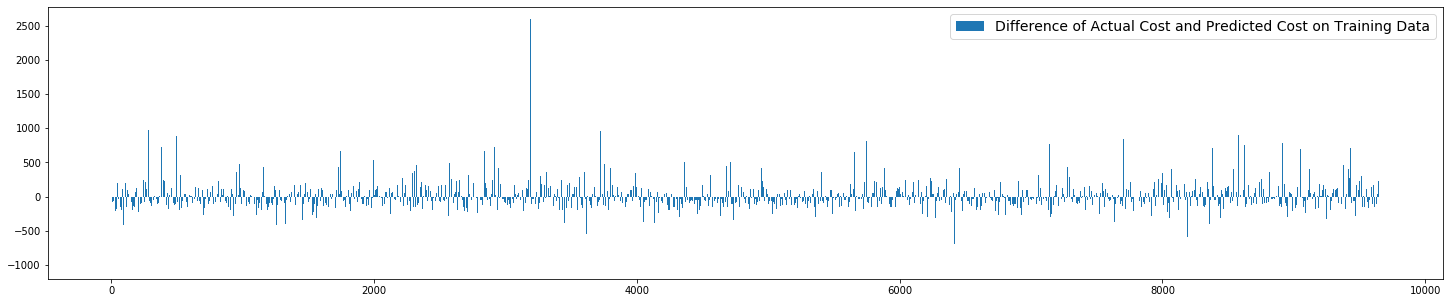

In [21]:
#plot
f, ax = plt.subplots(figsize=(25,5))
ind = np.arange(len(y_pred_train))
plt.bar(ind,y_train-y_pred_train, width=0.80, 
        label = 'Difference of Actual Cost and Predicted Cost on Training Data')
ax.legend(fontsize = 14)

In [22]:
# calculating accuracy over training set.
from sklearn.metrics import r2_score
print_accuracy_report(r2_score(y_train, y_pred_train))

Accuracy: 79.47%
Standard Deviation: ±0.00


> As we can see that the model has an accuracy of ~79% on training data. This accuracy is quite good, given the fact we have not tuned the hyperparameters and the size of data is not large for training.


---

## f)  Test your model in your testing set and evaluate its performance. Use a plot to justify your findings. How is it performing compared to your training data?

The following plot shows how the model performs on the testing set.

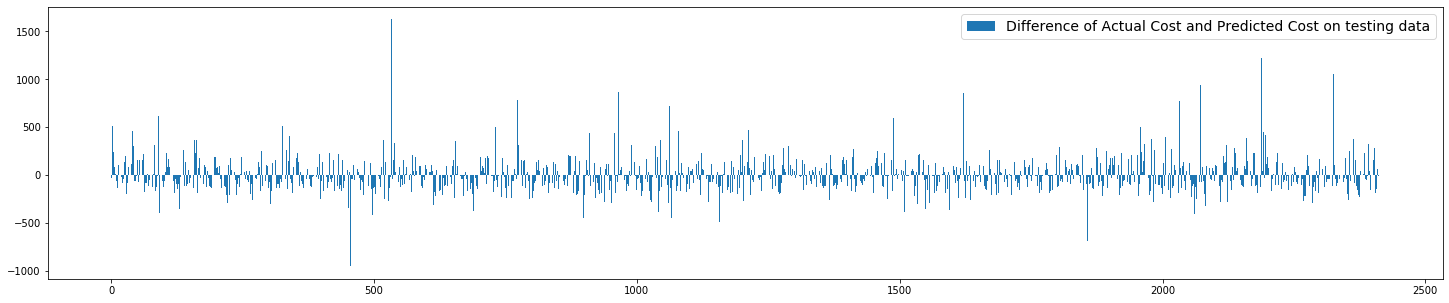

In [23]:
#plot
f, ax = plt.subplots(figsize=(25,5))
ind = np.arange(len(y_pred_test))
plt.bar(ind,y_test-y_pred_test, width=0.80, 
        label = 'Difference of Actual Cost and Predicted Cost on testing data')
ax.legend(fontsize = 14)

In [24]:
# calculating accuracy over testing set.
print_accuracy_report(r2_score(y_test, y_pred_test))

Accuracy: 74.37%
Standard Deviation: ±0.00


> The accuracy on testing data is ~74%. This is quite good in comparison to the accuracy on training data (79%). This proves that our model performs similarly on unseen data as well.
----


 ### Let's evaluate the model using the learning curve as shown below:

In [25]:
from sklearn.model_selection import learning_curve
# Code Referenced from 
# https://chrisalbkon.com/machine_learning/model_evaluation/plot_the_learning_curve/
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(xgbModel, 
                                                        features, 
                                                        target,
                                                        cv=6, 
                                                        scoring='r2',
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

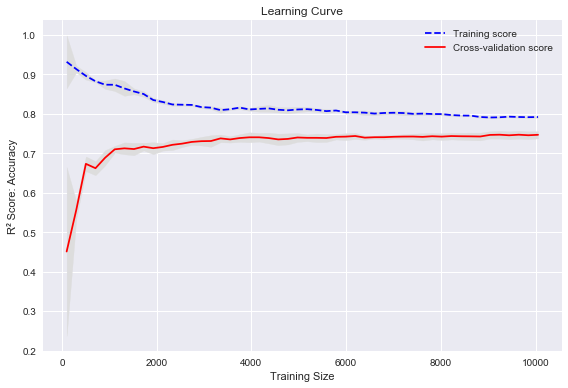

In [26]:
# Calculate mean and standard deviation of training and test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.style.use('seaborn')
# Draw lines
plt.plot(train_sizes, train_mean, '--', 
         color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, 
         color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Size"), plt.ylabel("R² Score: Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

 As we can see, as the number of training samples are increased, the model performs better on testing data.

We can see that the model performs more or less same after the training size increases from 6,000. So, we can say that this is the sweet spot of this model and we can stop training the model at this point.


 ## g)  Can you tune your model to perform better? Explain the technique you’re using and justify why it is improving your results.

In order to improve the performance of this model we can tune the hypermaters of xgBoostRegressor.

In a perfect world, we have infinite resources and time is not an issue, we could run a monstrous grid search with all the parameters collectively and find the optimal solution. 
While all the combinations are necessary to ensure that we find the best solution, our intention here is to find one that is sufficiently good by improving our out-of-the-box model with as few steps as possible.

The following code uses grid-search technique over the specified parameters to identify the ones that will improve the performance of the model. This is also done using cross validation technique 

In [27]:
# Improving XgBoost Model using GridSearch 
# NOTE: The execution of GridSearch can take approximately 40 minutes depen
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [3],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200,500]}

xgb_grid = GridSearchCV(xgbModel,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)


xgb_grid.fit(X_train,y_train)
preds = xgb_grid.predict(X_test)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  9.6min
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed: 31.3min finished


The parameters returned after performing an exhaustive search over the given subset are shown above.

In [28]:
print ("Parameters after tuning are:")
print (xgb_grid.best_params_)

Parameters after tuning are:
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


---


In [29]:
scoreXGGrid = r2_score(y_test, preds)
print_accuracy_report(scoreXGGrid)

Accuracy: 77.03%
Standard Deviation: ±0.00


> As we can see, the performance of the model has ***increased by ~4%.***
>
> One could say it's not very remarkable performance enhancement, but because we've accomplished it nearly for free, without adding information or engineering, merely by spending time tuning our model, it's not that bad.
>
> An important observation here is that parameter tuning does not transform a poor model to an excellent one. It just roughly tunes the model so that we get better results.

 ## h)  Use relief feature selection to improve your model. (BONUS)
 
 
 > Following is the code to implement relief feature selection technique using `skrebate` library.
 

In [30]:
# Referenced from https://gitlab.com/qafir/sklearn-relief/ 
# and 
# https://github.com/EpistasisLab/scikit-rebate

from skrebate import ReliefF
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline


input_matrix = scale(features)
label_vector = scale(target)

clf = make_pipeline(ReliefF(n_features_to_select=5,
                            n_neighbors=100)), xgb.XGBRegressor())

ScoreRelief = cross_val_score(clf, input_matrix, label_vector)
print_accuracy_report(ScoreRelief)

       

Accuracy: 72.61%
Standard Deviation: ±0.03


/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


The performance on execution of Relief Fetaure Selection comes out to be ~72%.

In order to improve this perfomance we need to tune the parameters. However, a single execution of this code took more than 2 hours so we are not executing it again due to computational limitations.

---

# We tried to solve this problem using some more regression models

*  **Baging**

In [31]:
# Implementing Regression through Bagging 

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagging = BaggingRegressor(DecisionTreeRegressor(),
                       max_features=0.5, n_estimators=100, random_state=4)

scoresBag = cross_val_score(bagging, features, target, cv=6, scoring='r2')
print_accuracy_report(scoresBag)

Accuracy: 73.69%
Standard Deviation: ±0.04


---

* **SVR**

In [32]:
# Implementing Regression through SVR 
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

scoreSVR = cross_val_score(svr_rbf, features, target, cv=6, scoring='r2')

print_accuracy_report(scoreSVR)

Accuracy: 74.73%
Standard Deviation: ±0.04


---


* **RandomForestRegressor**

In [33]:
# Implementing Regression through RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor

rfR = RandomForestRegressor(n_estimators=50, max_depth=None,
                             min_samples_split=2, random_state=0)

scoresR = cross_val_score(rfR, features, target, cv=6, scoring='r2')

print_accuracy_report(scoresR)

Accuracy: 74.35%
Standard Deviation: ±0.02


---


* **GradientBoostingRegressor**

In [34]:
# Implementing Regression through GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingRegressor

modelGradiant = GradientBoostingRegressor()
scoresG = cross_val_score(modelGradiant, features, target, cv=6, scoring='r2')

print_accuracy_report(scoresG)

Accuracy: 74.42%
Standard Deviation: ±0.01


---

### Let's compare the performance of all these models w.r.t. each other

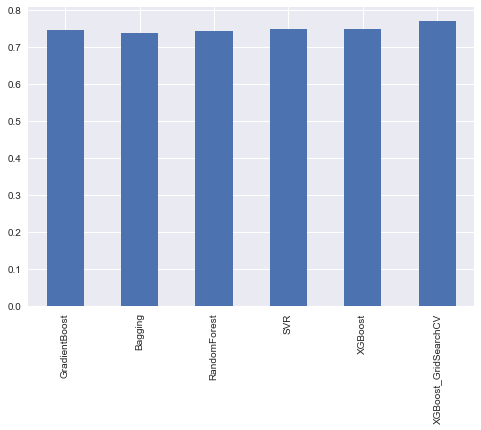

In [35]:
# Comparing Models using BAR plot
df=pd.DataFrame(scoresG,columns=['GradientBoost'])
df=df.assign(Bagging=scoresBag)
df=df.assign(RandomForest=scoresR)
df=df.assign(SVR=scoreSVR)
df=df.assign(XGBoost=scoreXG)
df=df.assign(XGBoost_GridSearchCV=scoreXGGrid)

df.mean().plot(kind='bar')

As we can see, almost all models performed similarly here.
We were able to improve the efficiency of XGBoost by tuning the hyperparameters using GridSearch Technique.


----

# References

[1] scikit-learn: machine learning in Python — scikit-learn 0.21.2 documentation. (2019). Retrieved from https://scikit-learn.org/stable/

[2] EpistasisLab/scikit-rebate. (2019). Retrieved from https://github.com/EpistasisLab/scikit-rebate

[3] seaborn: statistical data visualization — seaborn 0.9.0 documentation. (2019). Retrieved from https://seaborn.pydata.org/

[4] API Overview — Matplotlib 3.0.3 documentation. (2019). Retrieved from https://matplotlib.org/api/api_overview.html

[5] Reinstein, I. (2019). XGBoost, a Top Machine Learning Method on Kaggle, Explained. Retrieved from https://www.kdnuggets.com/2017/10/xgboost-top-machine-learning-method-kaggle-explained.html
